<a href="https://colab.research.google.com/github/jordan24cyber/project-yohathor/blob/main/UTS_ANN_yordan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Step 2: Load dataset
from google.colab import files
df = pd.read_csv("earthquake_alert_balanced_dataset.csv")

In [ ]:
# Preview
print("Data preview:")
display(df.head())
print("\nDataset shape:", df.shape)

Data preview:


,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green
1,6.9,25.0,4.0,4.0,-33.0,green
2,7.0,579.0,3.0,3.0,-13.0,green
3,7.3,37.0,5.0,5.0,65.0,green
4,6.6,624.0,0.0,2.0,-98.0,green



Dataset shape: (1300, 6)


In [ ]:
# Step 3: Separate features and target
target_column = 'alert'
X = df.drop(columns=[target_column])
y = df[target_column]

In [ ]:
# Step 4: Encode target if categorical
if y.dtype == 'object' or len(y.unique()) > 2:
    le = LabelEncoder()
    y = le.fit_transform(y)
    print("Encoded labels:", dict(zip(le.classes_, range(len(le.classes_)))))

Encoded labels: {'green': 0, 'orange': 1, 'red': 2, 'yellow': 3}


In [ ]:
# Step 5: Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Step 6: Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Step 7: Build ANN model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax' if len(np.unique(y)) > 2 else 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 8: Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy' if len(np.unique(y)) > 2 else 'binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Step 9: Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.3378 - loss: 1.3672 - val_accuracy: 0.5721 - val_loss: 1.2381
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5268 - loss: 1.2007 - val_accuracy: 0.5625 - val_loss: 1.0823
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5704 - loss: 1.0445 - val_accuracy: 0.5817 - val_loss: 0.9790
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5827 - loss: 0.9532 - val_accuracy: 0.6202 - val_loss: 0.9121
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5849 - loss: 0.8802 - val_accuracy: 0.6154 - val_loss: 0.8711
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6414 - loss: 0.8099 - val_accuracy: 0.6298 - val_loss: 0.8434
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6401 - loss: 0.7955 - val_accuracy: 0.6538 - val_loss: 0.8277
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6341 - loss: 0.7810 - val_accuracy: 0.6490 - va

In [ ]:
# Step 10: Evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {acc*100:.2f}%")



Test Accuracy: 80.00%


In [ ]:
# Step 11: Predictions
y_pred = np.argmax(model.predict(X_test), axis=-1) if len(np.unique(y)) > 2 else (model.predict(X_test) > 0.5).astype(int)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
# Step 12: Report
print("\nClassification Report:\n", classification_report(y_test_int, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_int, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.80      0.87        65
           1       0.76      0.74      0.75        65
           2       0.73      0.97      0.83        65
           3       0.79      0.69      0.74        65

    accuracy                           0.80       260
   macro avg       0.81      0.80      0.80       260
weighted avg       0.81      0.80      0.80       260


Confusion Matrix:
 [[52  2  1 10]
 [ 0 48 15  2]
 [ 0  2 63  0]
 [ 2 11  7 45]]


=== DATA PREVIEW ===


,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green
1,6.9,25.0,4.0,4.0,-33.0,green
2,7.0,579.0,3.0,3.0,-13.0,green
3,7.3,37.0,5.0,5.0,65.0,green
4,6.6,624.0,0.0,2.0,-98.0,green



=== INFO DATA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1300 non-null   float64
 1   depth      1300 non-null   float64
 2   cdi        1300 non-null   float64
 3   mmi        1300 non-null   float64
 4   sig        1300 non-null   float64
 5   alert      1300 non-null   object 
dtypes: float64(5), object(1)
memory usage: 61.1+ KB
None

=== MISSING VALUES ===
magnitude    0
depth        0
cdi          0
mmi          0
sig          0
alert        0
dtype: int64

=== DESCRIPTIVE STATISTICS ===


,magnitude,depth,cdi,mmi,sig
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,7.061008,50.321538,6.976154,6.939231,-9.749231
std,0.423738,104.348286,2.244875,1.354774,62.245214
min,6.500000,2.000000,0.000000,1.000000,-128.000000
25%,6.700000,12.000000,6.000000,6.000000,-54.000000
50%,7.000000,19.000000,8.000000,7.000000,-7.000000
75%,7.300000,38.000000,8.000000,8.000000,31.000000
max,8.600000,670.000000,9.000000,9.000000,127.000000


Kolom 'label' tidak ditemukan! Ganti nama kolom target sesuai dataset kamu.


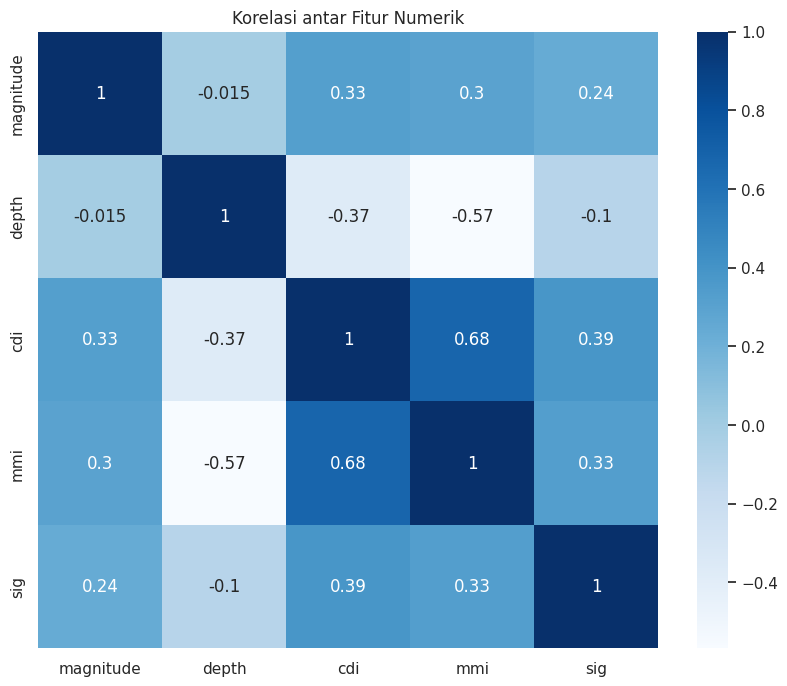

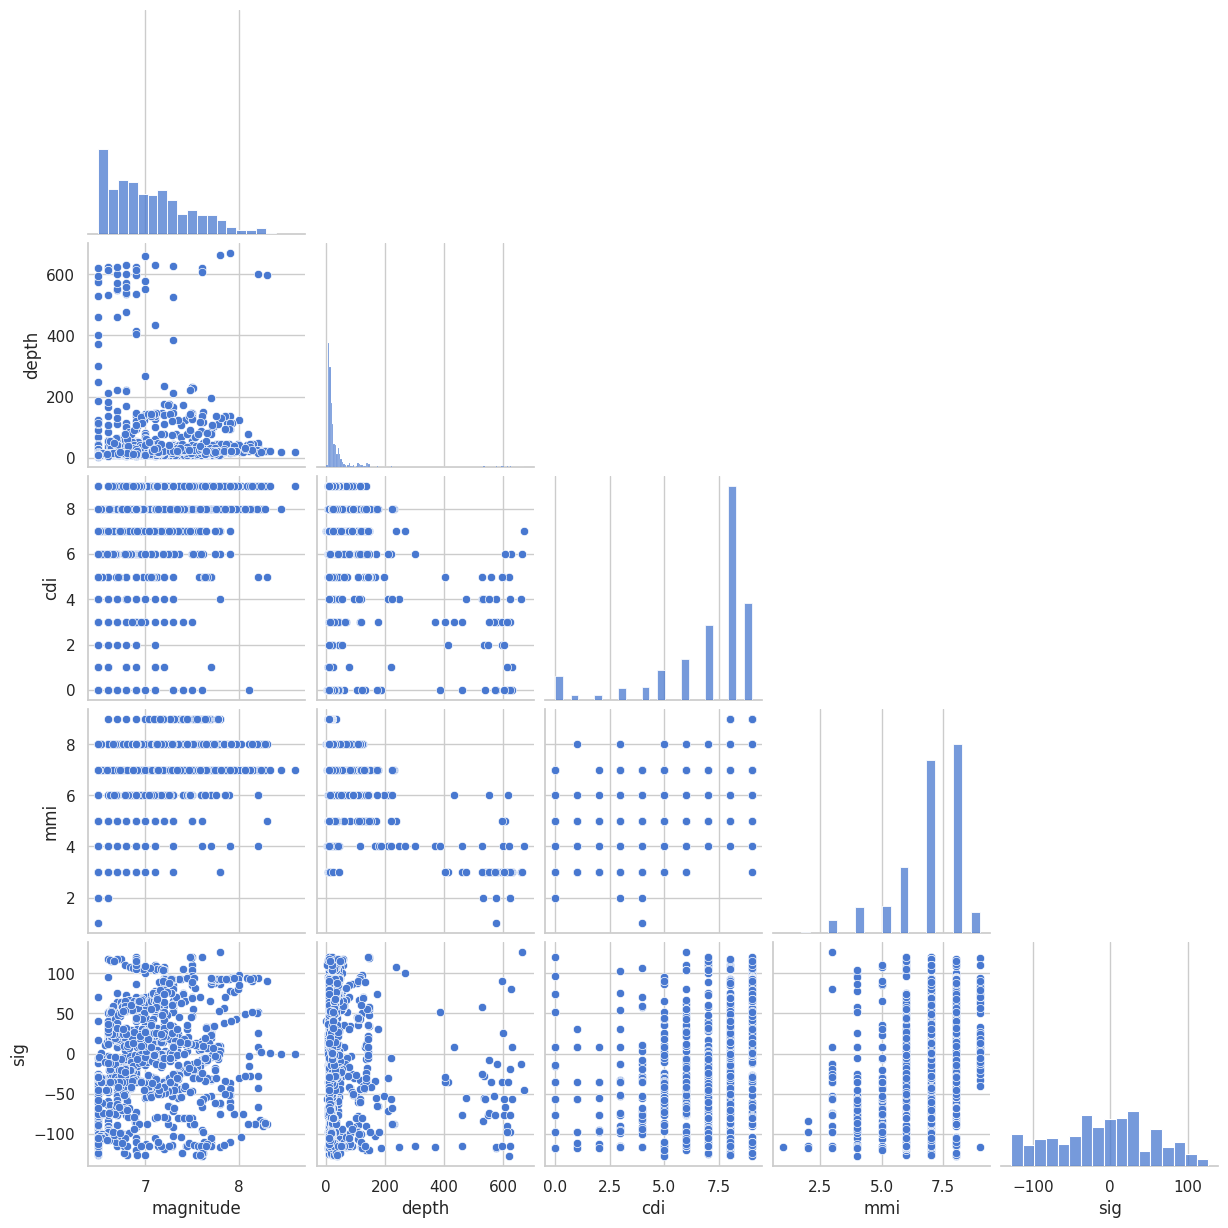

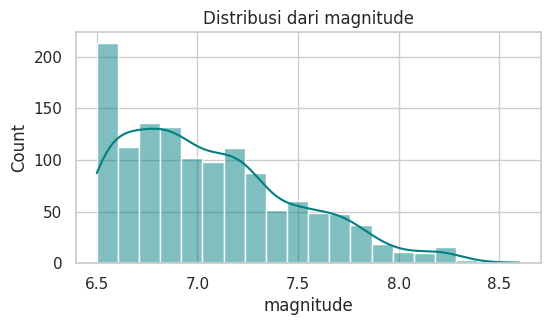

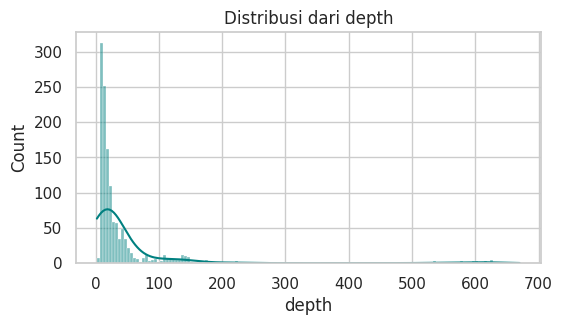

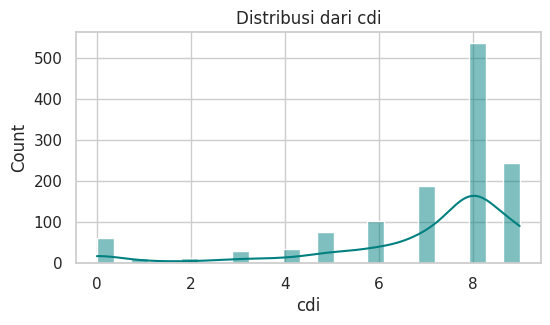

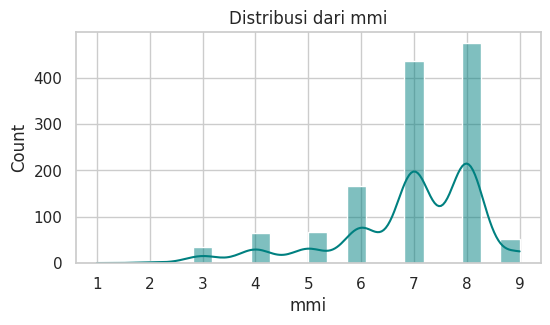

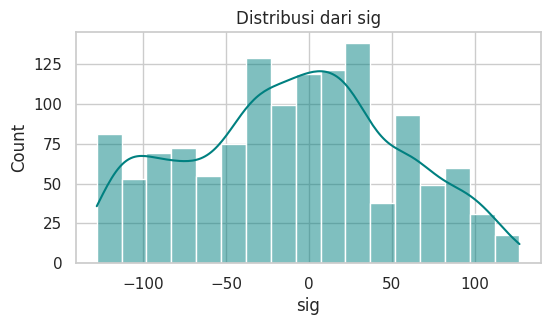

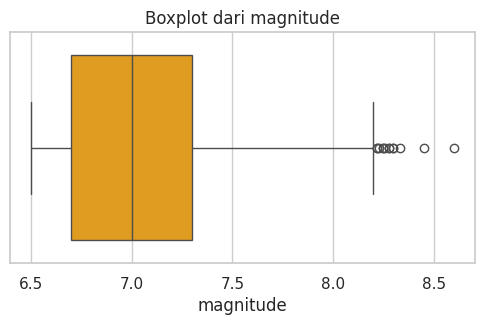

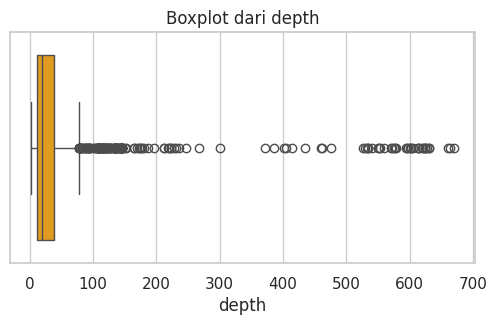

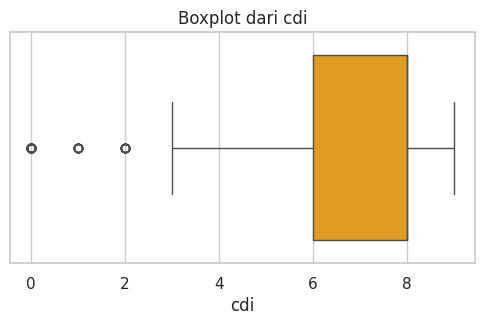

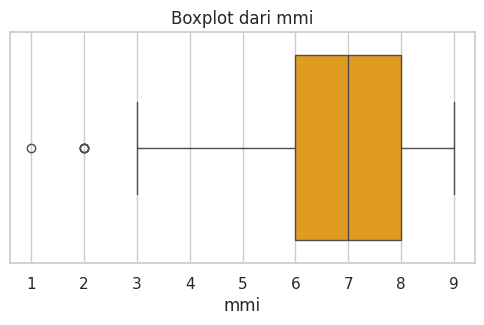

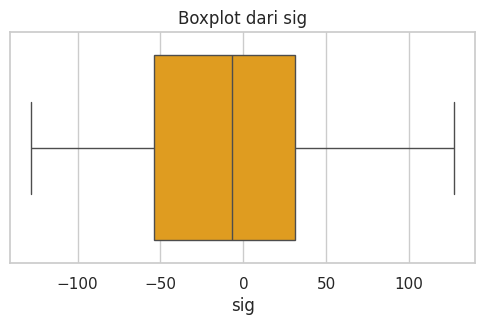

In [ ]:
# ==============================================
# EARTHQUAKE ALERT DATA VISUALIZATION (SEABORN)
# ==============================================

# STEP 1: Upload CSV ke Colab
df = pd.read_csv("earthquake_alert_balanced_dataset.csv")

# STEP 2: Import library utama
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Setting gaya visualisasi
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = [8, 5]

# STEP 3: Load dataset
df = pd.read_csv('earthquake_alert_balanced_dataset.csv')

print("=== DATA PREVIEW ===")
display(df.head())

print("\n=== INFO DATA ===")
print(df.info())

# STEP 4: Cek missing values dan statistik deskriptif
print("\n=== MISSING VALUES ===")
print(df.isnull().sum())

print("\n=== DESCRIPTIVE STATISTICS ===")
display(df.describe())

# STEP 5: Tentukan kolom target
# ⚠ Ganti 'label' dengan nama kolom target dari dataset kamu
target_col = 'label'  # ubah sesuai nama kolom target
if target_col not in df.columns:
    print(f"Kolom '{target_col}' tidak ditemukan! Ganti nama kolom target sesuai dataset kamu.")
else:
    print(f"\nKolom target yang digunakan: {target_col}")

# STEP 6: Countplot distribusi target
if target_col in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=target_col, data=df, palette='coolwarm')
    plt.title('Distribusi Kelas Target')
    plt.show()

# STEP 7: Heatmap korelasi antar fitur numerik
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Korelasi antar Fitur Numerik')
plt.show()

# STEP 8: Pairplot antar fitur
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
if len(num_cols) > 5:
    sample_cols = num_cols[:5]  # ambil 5 kolom pertama agar tidak berat
else:
    sample_cols = num_cols

if target_col in df.columns:
    sns.pairplot(df[sample_cols.tolist() + [target_col]], hue=target_col, corner=True)
else:
    sns.pairplot(df[sample_cols], corner=True)
plt.show()

# STEP 9: Distribusi tiap fitur numerik
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f'Distribusi dari {col}')
    plt.show()

# STEP 10: Boxplot untuk mendeteksi outlier
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot dari {col}')
    plt.show()

# STEP 11: Simpan salah satu grafik contoh
if target_col in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(x=target_col, data=df, palette='magma')
    plt.title('Distribusi Target')
    plt.savefig('target_distribution.png')
    print("\nGrafik disimpan sebagai: target_distribution.png")